In [9]:
import numpy as np
import pandas as pd
from sklearn import tree 
from sklearn import preprocessing

In [18]:
model=pd.read_csv('train.csv')
label_encoder=preprocessing.LabelEncoder()
model["Sex"]=label_encoder.fit_transform(model["Sex"])

In [11]:
features=pd.DataFrame([model["Sex"], model["Age"], model['Fare']]).T
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier()
tree_model.fit(X=pd.DataFrame(features), y=model['Survived'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [12]:
with open("tree1.dot", "w") as f:
  f=tree.export_graphviz(tree_model, feature_names=['Sex', 'Age', 'Fare'], out_file=f);

[Text(136.34950243477485, 212.49818181818182, 'X[0] <= 0.5\ngini = 0.472\nsamples = 889\nvalue = [549, 340]'),
 Text(98.18222390993567, 202.61454545454546, 'X[2] <= 48.2\ngini = 0.384\nsamples = 312\nvalue = [81, 231]'),
 Text(83.40833631165118, 192.73090909090908, 'X[2] <= 27.825\ngini = 0.447\nsamples = 225\nvalue = [76, 149]'),
 Text(65.34762330235883, 182.84727272727272, 'X[2] <= 25.698\ngini = 0.428\nsamples = 193\nvalue = [60, 133]'),
 Text(48.37130092923517, 172.96363636363637, 'X[2] <= 24.075\ngini = 0.453\nsamples = 167\nvalue = [58, 109]'),
 Text(28.538170121515368, 163.07999999999998, 'X[2] <= 10.481\ngini = 0.442\nsamples = 161\nvalue = [53, 108]'),
 Text(10.529807005003574, 153.19636363636363, 'X[2] <= 8.04\ngini = 0.489\nsamples = 66\nvalue = [28, 38]'),
 Text(3.8290207290922087, 143.31272727272727, 'X[2] <= 6.987\ngini = 0.425\nsamples = 49\nvalue = [15, 34]'),
 Text(1.9145103645461043, 133.42909090909092, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(5.7435310936383

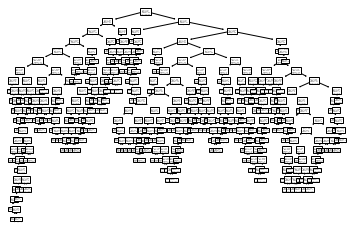

In [13]:
tree.plot_tree(tree_model)

In [14]:
tree_model.score(X=features, y=model['Survived'])

0.9763779527559056

In [15]:
test1=pd.read_csv('test.csv')
test1["Sex"]=label_encoder.fit_transform(test1['Sex'])
features=pd.DataFrame([test1['Sex'], test1['Age'], test1['Fare']]).T
tree_1=tree_model.predict(X=features)

In [16]:
predicted=pd.DataFrame({"PassengerId" : test1['PassengerId'], 'Survived' : tree_1})
predicted.to_csv('output.csv', index=False)
print(predicted)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         1
4            896         0
..           ...       ...
412         1305         0
413         1306         1
414         1307         0
415         1308         0
416         1309         0

[417 rows x 2 columns]


In [22]:
model.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [30]:
functions=pd.DataFrame([model['Sex'], model["Age"], model["Fare"], model['Pclass']]).T

In [26]:
model["Sex"]=label_encoder.fit_transform(model['Sex'])

In [31]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(n_estimators=1000, max_depth=8, oob_score=True)
model_rf.fit(X=functions, y=model['Survived'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
for function,imp in zip(functions, model_rf.feature_importances_):
  print(function,imp)

Sex 0.37602216315625897
Age 0.21963916787387902
Fare 0.2746737203413951
Pclass 0.12966494862846692
